In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
from visualizations import barcharts as vis
from visualizations import sandbox_visuals as p

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# projects we've already done data production for -- 11 remote, 6 field
remote_done = [
'CAM_22_FAP',
'LBR_22_SCNL',
'MDG_22_DWCT',
'MLW_22_WFZ',
'RWA_22_ARCOS',
'RWA_22_ICRAF',
'RWA_22_BIRDLIFE',
'SLE_22_YARDO',
'TAZ_22_SJT',
'TGO_22_MAPTO',
'TGO_22_PERJAT',
]#11

field_done = [
'GHA_22_INEC',
'GHA_22_PADO',
'KEN_22_GREENPOT',
'GHA_22_ECOCARE',
'GHA_22_GGV',
'KEN_22_DNRC',
] #6

mangrove_done = [
'GHA_22_FOTE',
'MOZ_22_ISTITUTO',
'TAZ_22_FT',
'GHA_22_HMPOANO',
] #4

review_req = [
    "TGO_PADES",
    "SLE_22_EFA",
    "NIG_22_ARAMD",
    "KEN_22_FT",
    "GIN_22_AMSPM",
    "DRC_22_PWP",
    "BUR_22_PWP",
    "MLI_22_SAHELECO"
]

remote_upcoming = ['CAR_22_EEDD', 
                   'KEN_22_DREK', 
                   'RWA_22_SE', 
                   'UGA_22_SWAGEN', 
                   'UGA_22_PANR', 
                   'NIG_22_NCF', 
                   'ETH_22_WVE', 
                   'ETH_22_SUNARMA', 
                   'RWA_22_RECOR', 
                   'CIV_22_SOSFORETS', 
                   'KEN_22_KENVO', 
                   'NIG_22_IITA', 
                   'TGO_22_ADHD'] #13


## Notes on Findings

Experiments
- shifting the canopy cover threshold from 40% to 60% had the impact of moving 19 polygons from weak to strong remote, but insignificant in shifting proportion allocated to field.

Other updates / findings
- 13 projects contain multiple practices in a single polygon. 4 projects updated where a single row contains a multi-practice entry. Some projects are all multi-practice, so no clear solution.
- EV will use baseline canopy if 2 yr mark has passed (TTC not yet run for EV).
  
In what scenarios will the decision tree be unable to provide a result?
- If more than one practice is being used (i.e. `assisted-natural-regeneration,tree-planting`)
- 228 are flagged with `review required`. This is due to having multiple `practice` values assigned to a single polygon (159 polygons) or missing canopy cover at baseline (69 polygons).
  

In [4]:
ply = pd.read_csv("../data/decision_scores/poly_output_c1_07-14-2025_exp5.csv")
prj = pd.read_csv("../data/decision_scores/prj_output_c1_07-14-2025_exp5.csv")

In [18]:
#vis.portfolio_breakdown_project(prj)

In [19]:
#vis.portfolio_breakdown_polygon(ply)

In [20]:
#vis.baseline_counts(prj);

In [ ]:
done = set(remote_done) | set(field_done) | set(mangrove_done)
c1_remain = df[~df['project_name'].isin(done)]
print(len(done), len(c1_remain.project_name.unique()))

In [ ]:
# Remaining field verification requirements for Cohort 1
remove = set(remote_done) | set(field_done) | set(mangrove_done) | set(remote_upcoming)
c1_field = df[~df['project_name'].isin(remove)]

In [ ]:
len(c1_field.project_name.unique())

## Remote Upcoming
- For the polygons that are not strong remote, does anything indicate we need to adjust the criteria?

In [ ]:
rm = df[df['project_name'].isin(remote_upcoming)]
vis.plot_decision_proportions(rm, sort_by='strong remote', title = '13 Qualified for Remote Verification')

## Compare baseline & EV decisions

In [ ]:
df4 = pd.read_csv("../data/results/dtree_output_c1_07-14-2025_exp4.csv")

review = set(mangrove_done) | set(review_req)
done = set(remote_done) | set(field_done) | set(mangrove_done) | set(review_req)
field = set(field_done)
remote = set(remote_done)
c1_field = df4[df4['project_name'].isin(field)]
c1_remote = df4[df4['project_name'].isin(remote)]
c1_remaining = df4[~df4['project_name'].isin(done)]
c1_review = df4[df4['project_name'].isin(review)]

In [ ]:
print(len(c1_remaining.project_name.unique()))

In [ ]:
vis.plot_decision_proportions(
    c1_field,
    sort_by="strong field",      
    group_height=0.8,
    figsize=(24, len(df4.project_id.unique()) * 0.1),
    title="COMPLETED - FIELD",
)

In [ ]:
vis.plot_decision_proportions(
    c1_remote,
    sort_by=["strong remote"],      
    group_height=0.8,
    figsize=(24, len(df4.project_id.unique()) * 0.15),
    title="COMPLETED - REMOTE",
)

In [ ]:
vis.plot_decision_proportions(
    c1_remaining,
    sort_by=["strong remote", "weak remote"],      
    group_height=0.8,
    figsize=(24, len(df4.project_id.unique()) * 0.4),
    title="REMAINING",
    threshold=0.8,
)

# Check results

In [ ]:
## resolve practice

df1.practice.value_counts()

In [ ]:
multi_practice_df = df1[df1['practice'].str.contains(',')]
multi_practice_df.decision.value_counts()

In [ ]:
multi_practice_df.project_name.value_counts()

In [ ]:
len(multi_practice_df.project_name.unique())

In [ ]:
prj = df1[df1.project_name == 'DRC_22_PWP']
prj
#prj.to_csv('../data/surudev.csv')

In [ ]:
df.target_sys.value_counts()

In [ ]:
df.decision.value_counts()

In [ ]:
len(df.project_id.unique()), len(df.project_name.unique())

In [ ]:
df.head()

In [ ]:
review = df[df.decision == 'review required']

In [ ]:
#review[review['baseline_canopy'].isna()]

In [ ]:
review.baseline_canopy.value_counts(dropna=False)

In [ ]:
review_open = review[review.baseline_canopy == 'open']
review_closed = review[review.baseline_canopy == 'closed']

In [ ]:
review_open.practice.value_counts()

In [ ]:
review_closed

In [ ]:
review_closed.slope.value_counts(dropna=False)

In [ ]:
review_closed.info()

In [ ]:
df.slope.value_counts(dropna=False)

In [ ]:
review_tree = review[(review.practice == 'tree-planting')]

In [ ]:
review_tree.baseline_canopy.value_counts(dropna=False)


In [ ]:
review_tree.shape

In [ ]:
review_tree

In [ ]:
review_seeding = review[(review.practice == 'direct-seeding')]

In [ ]:
review_seeding.baseline_canopy.value_counts(dropna=False)

In [ ]:
review.baseline_canopy.value_counts(dropna=False)

## Brownbag

In [6]:
df4 = pd.read_csv("../data/tree_output/dtree_output_c1_07-14-2025_exp4.csv")

review = set(mangrove_done) | set(review_req)
done = set(remote_done) | set(field_done) | set(mangrove_done) | set(review_req)
field = set(field_done)
remote = set(remote_done)

c1_field = df4[df4['project_name'].isin(field)]
c1_remote = df4[df4['project_name'].isin(remote)]
c1_remaining = df4[~df4['project_name'].isin(done)]
c1_review = df4[df4['project_name'].isin(review)]

In [10]:
#p.plot_risk_map(c1_field, (10,10));

In [ ]:
# vis.plot_decision_proportions_faceted(c1_remaining, 
#                                       ncols=4, 
#                                       figsize=(44, 40), 
#                                       title="Decision proportions by project", 
#                                       annotate=True,   # set True to show labels
#                                       label_min_prop=0.25)

In [ ]:
# balanced
# vis.plot_decision_proportions_faceted(c1_remaining, ncols=6, figsize=(19, 14), title="Decision proportions by project",
#     annotate=True
# )

# Risk Profile

In [11]:
def plot_risk_matrix(
    df: pd.DataFrame,
    x_col: str = "baseline_project_score_0_100",
    y_col: str = "ev_project_score_0_100",
    label_col: str = "project_name",
    threshold: float = 40.0,
    figsize: tuple = (8, 8),
    fontsize: int = 9,
    max_iter: int = 300,
    move_x: float = 0.6,   # how far to nudge labels (data units) when overlapping
    move_y: float = 0.6,
):
    """
    Scatter with project labels and automatic de-overlap for text.

    - X axis: baseline_project_score_0_100
    - Y axis: ev_project_score_0_100
    - Each point labeled by project_name
    - Dashed guides at `threshold` on both axes
    - Simple, dependency-free label de-overlap (iterative nudging in data units)

    Returns
    -------
    fig, ax
    """
    # --- data prep ---
    work = df[[x_col, y_col, label_col]].copy()
    work[x_col] = pd.to_numeric(work[x_col], errors="coerce")
    work[y_col] = pd.to_numeric(work[y_col], errors="coerce")
    work = work.dropna(subset=[x_col, y_col])

    # --- plot ---
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(work[x_col], work[y_col])

    # place initial labels with small offset (data units)
    texts = []
    for _, r in work.iterrows():
        txt = ax.text(
            r[x_col] + 0.5,
            r[y_col] + 0.5,
            str(r[label_col]),
            fontsize=fontsize,
            va="center",
            ha="left",
        )
        texts.append(txt)

    # guides
    ax.axvline(threshold, linestyle="--", linewidth=1)
    ax.axhline(threshold, linestyle="--", linewidth=1)

    # axes / grid
    ax.set_xlabel("Baseline Project Score (0–100)")
    ax.set_ylabel("EV Project Score (0–100)")
    ax.set_title("Baseline vs EV Project Scores (Project-Level)")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.grid(True, linestyle="--", alpha=0.4)

    # --- automatic de-overlap routine (no external deps) ---
    def _overlaps(a, b, renderer):
        ra = a.get_window_extent(renderer=renderer).expanded(1.02, 1.10)  # tiny padding
        rb = b.get_window_extent(renderer=renderer).expanded(1.02, 1.10)
        return ra.overlaps(rb)

    def _nudge(text, dx, dy):
        x, y = text.get_position()
        text.set_position((x + dx, y + dy))

    # draw once so that text bboxes exist
    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()

    # keep within axes limits helper
    def _clamp_to_axes(text):
        x, y = text.get_position()
        x = min(max(x, ax.get_xlim()[0]), ax.get_xlim()[1])
        y = min(max(y, ax.get_ylim()[0]), ax.get_ylim()[1])
        text.set_position((x, y))

    # iterative resolution
    n = len(texts)
    if n > 1:
        for _ in range(max_iter):
            moved_any = False
            # recompute boxes each pass
            fig.canvas.draw()
            for i in range(n):
                for j in range(i + 1, n):
                    if _overlaps(texts[i], texts[j], renderer):
                        # push the later one away from the earlier one
                        xi, yi = texts[i].get_position()
                        xj, yj = texts[j].get_position()
                        # vector from i -> j
                        vx, vy = (xj - xi, yj - yi)
                        # choose a direction; if nearly zero, pick a default
                        if abs(vx) + abs(vy) < 1e-6:
                            vx, vy = 1.0, 0.4
                        # normalize to unit steps in data units and scale by move_x / move_y
                        step_x = move_x if vx >= 0 else -move_x
                        step_y = move_y if vy >= 0 else -move_y
                        _nudge(texts[j], step_x, step_y)
                        _clamp_to_axes(texts[j])
                        moved_any = True
            if not moved_any:
                break

    plt.tight_layout()
    return fig, ax

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Baseline vs EV Project Scores (Project-Level)'}, xlabel='Baseline Project Score (0–100)', ylabel='EV Project Score (0–100)'>)

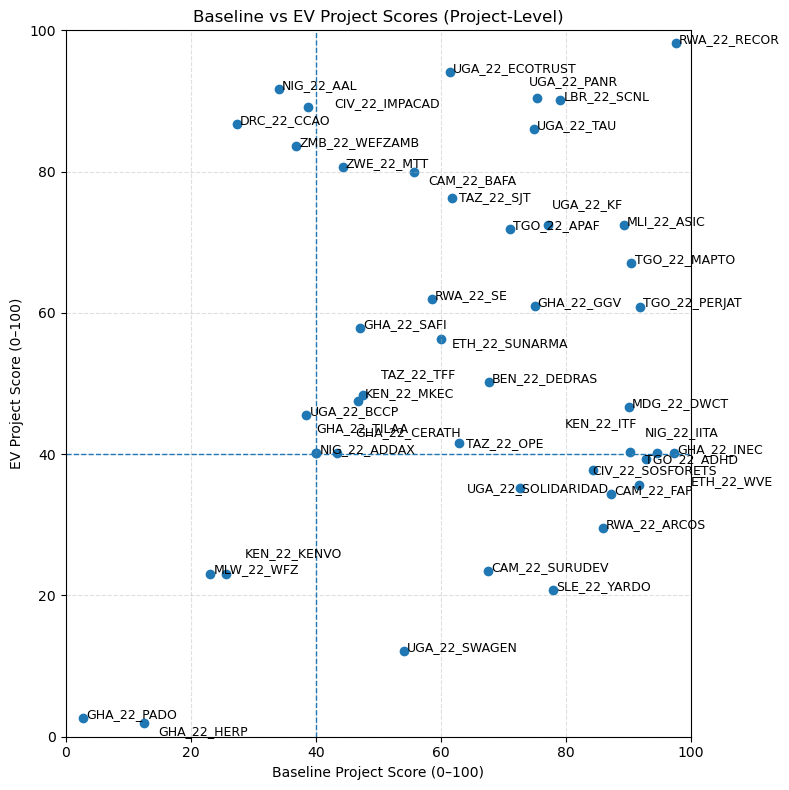

In [13]:
plot_risk_matrix(prj)

In [14]:
prj[prj.project_name == 'GHA_22_PADO']

,project_id,project_name,total_area,baseline_project_score_0_100,baseline_project_label,baseline_coverage_area_frac,baseline_scored_poly_count,baseline_total_poly_count,scored_area_baseline,baseline_frac_mangrove,baseline_frac_review,ev_project_score_0_100,ev_project_label,ev_coverage_area_frac,ev_scored_poly_count,ev_total_poly_count,scored_area_ev,ev_frac_mangrove,ev_frac_review
23,476273a3-d0b3-4f89-be10-9703f038d0c0,GHA_22_PADO,80.805,2.7,strong field,1.0,1,1,80.805,0.0,0.0,2.7,strong field,1.0,1,1,80.805,0.0,0.0


In [7]:
full_list = list(set(prj.project_name))
full_list

['TGO_22_ADHD',
 'TAZ_22_SJT',
 'ZMB_22_SCOPE',
 'UGA_22_SWAGEN',
 'GHA_22_CERATH',
 'MLI_22_ASIC',
 'LBR_22_SCNL',
 'MLI_22_SAHELECO',
 'UGA_22_ECOTRUST',
 'CIV_22_SOSFORETS',
 'MDG_22_DWCT',
 'KEN_22_DREK',
 'GHA_22_HMPOANO',
 'ETH_22_SUNARMA',
 'ZWE_22_MTT',
 'KEN_22_MKEC',
 'NIG_22_AAL',
 'KEN_22_KFT',
 'SLE_22_YARDO',
 'BEN_22_ECOBEN',
 'ZWE_22_SAFIRE',
 'DRC_22_PWP',
 'GIN_22_AMSPM',
 'GHA_22_GGV',
 'ZMB_22_WEFZAMB',
 'UGA_22_TAU',
 'DRC_22_CCAO',
 'NIG_22_ADDAX',
 'NIG_22_ARAMD',
 'MDG_22_ICTE',
 'GHA_22_ECOCARE',
 'UGA_22_SOLIDARIDAD',
 'BUR_22_PWP',
 'RWA_22_SE',
 'GHA_22_FOTE',
 'GHA_22_PADO',
 'UGA_22_NTISD',
 'SLE_22_EFA',
 'BFA_22_AGEREF-CL',
 'MLW_22_WAG',
 'NIG_22_IITA',
 'GHA_22_HERP',
 'GHA_22_TILAA',
 'NIG_22_NCF',
 'KEN_22_KENVO',
 'BEN_22_DEDRAS',
 'TAZ_22_KIJANIP',
 'UGA_22_PANR',
 'TAZ_22_OPE',
 'GHA_22_SAFI',
 'KEN_22_GREENPOT',
 'RWA_22_ICRAF',
 'TGO_22_APAF',
 'TAZ_22_FT',
 'KEN_22_ITF',
 'RWA_22_BIRDLIFE',
 'TGO_22_MAPTO',
 'MOZ_22_ISTITUTO',
 'ETH_22_WVE',
 '

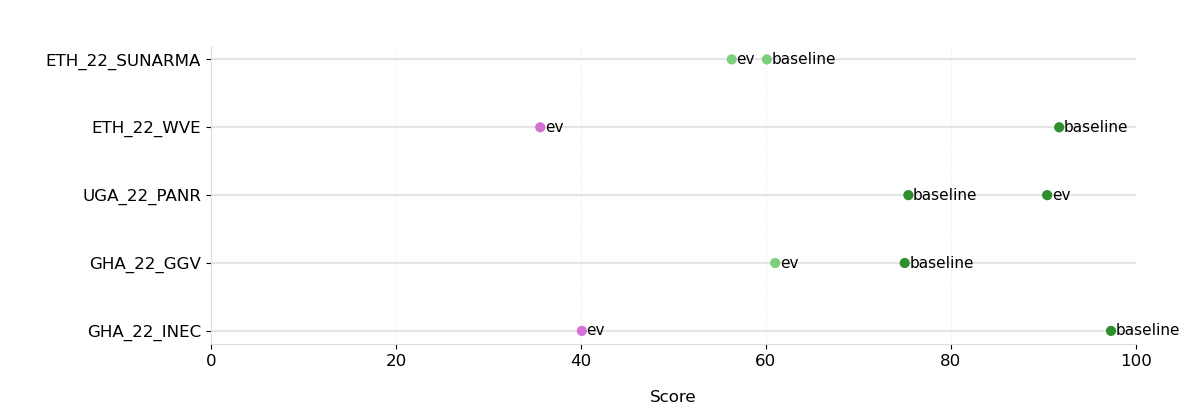

In [17]:
vis.plot_project_scores_dumbbell(prj, 
                                 ['GHA_22_INEC','GHA_22_GGV','UGA_22_PANR', 'ETH_22_WVE', 'ETH_22_SUNARMA', ],
                                )

[skip] ZMB_22_SCOPE does not contain enough information to be plotted (baseline=50.9, ev=nan).
[skip] MLI_22_SAHELECO does not contain enough information to be plotted (baseline=nan, ev=nan).
[skip] KEN_22_DREK does not contain enough information to be plotted (baseline=91.7, ev=nan).
[skip] GHA_22_HMPOANO does not contain enough information to be plotted (baseline=nan, ev=nan).
[skip] KEN_22_KFT does not contain enough information to be plotted (baseline=29.9, ev=nan).
[skip] BEN_22_ECOBEN does not contain enough information to be plotted (baseline=nan, ev=nan).
[skip] ZWE_22_SAFIRE does not contain enough information to be plotted (baseline=49.4, ev=nan).
[skip] DRC_22_PWP does not contain enough information to be plotted (baseline=nan, ev=nan).
[skip] GIN_22_AMSPM does not contain enough information to be plotted (baseline=nan, ev=nan).
[skip] NIG_22_ARAMD does not contain enough information to be plotted (baseline=nan, ev=nan).
[skip] MDG_22_ICTE does not contain enough information

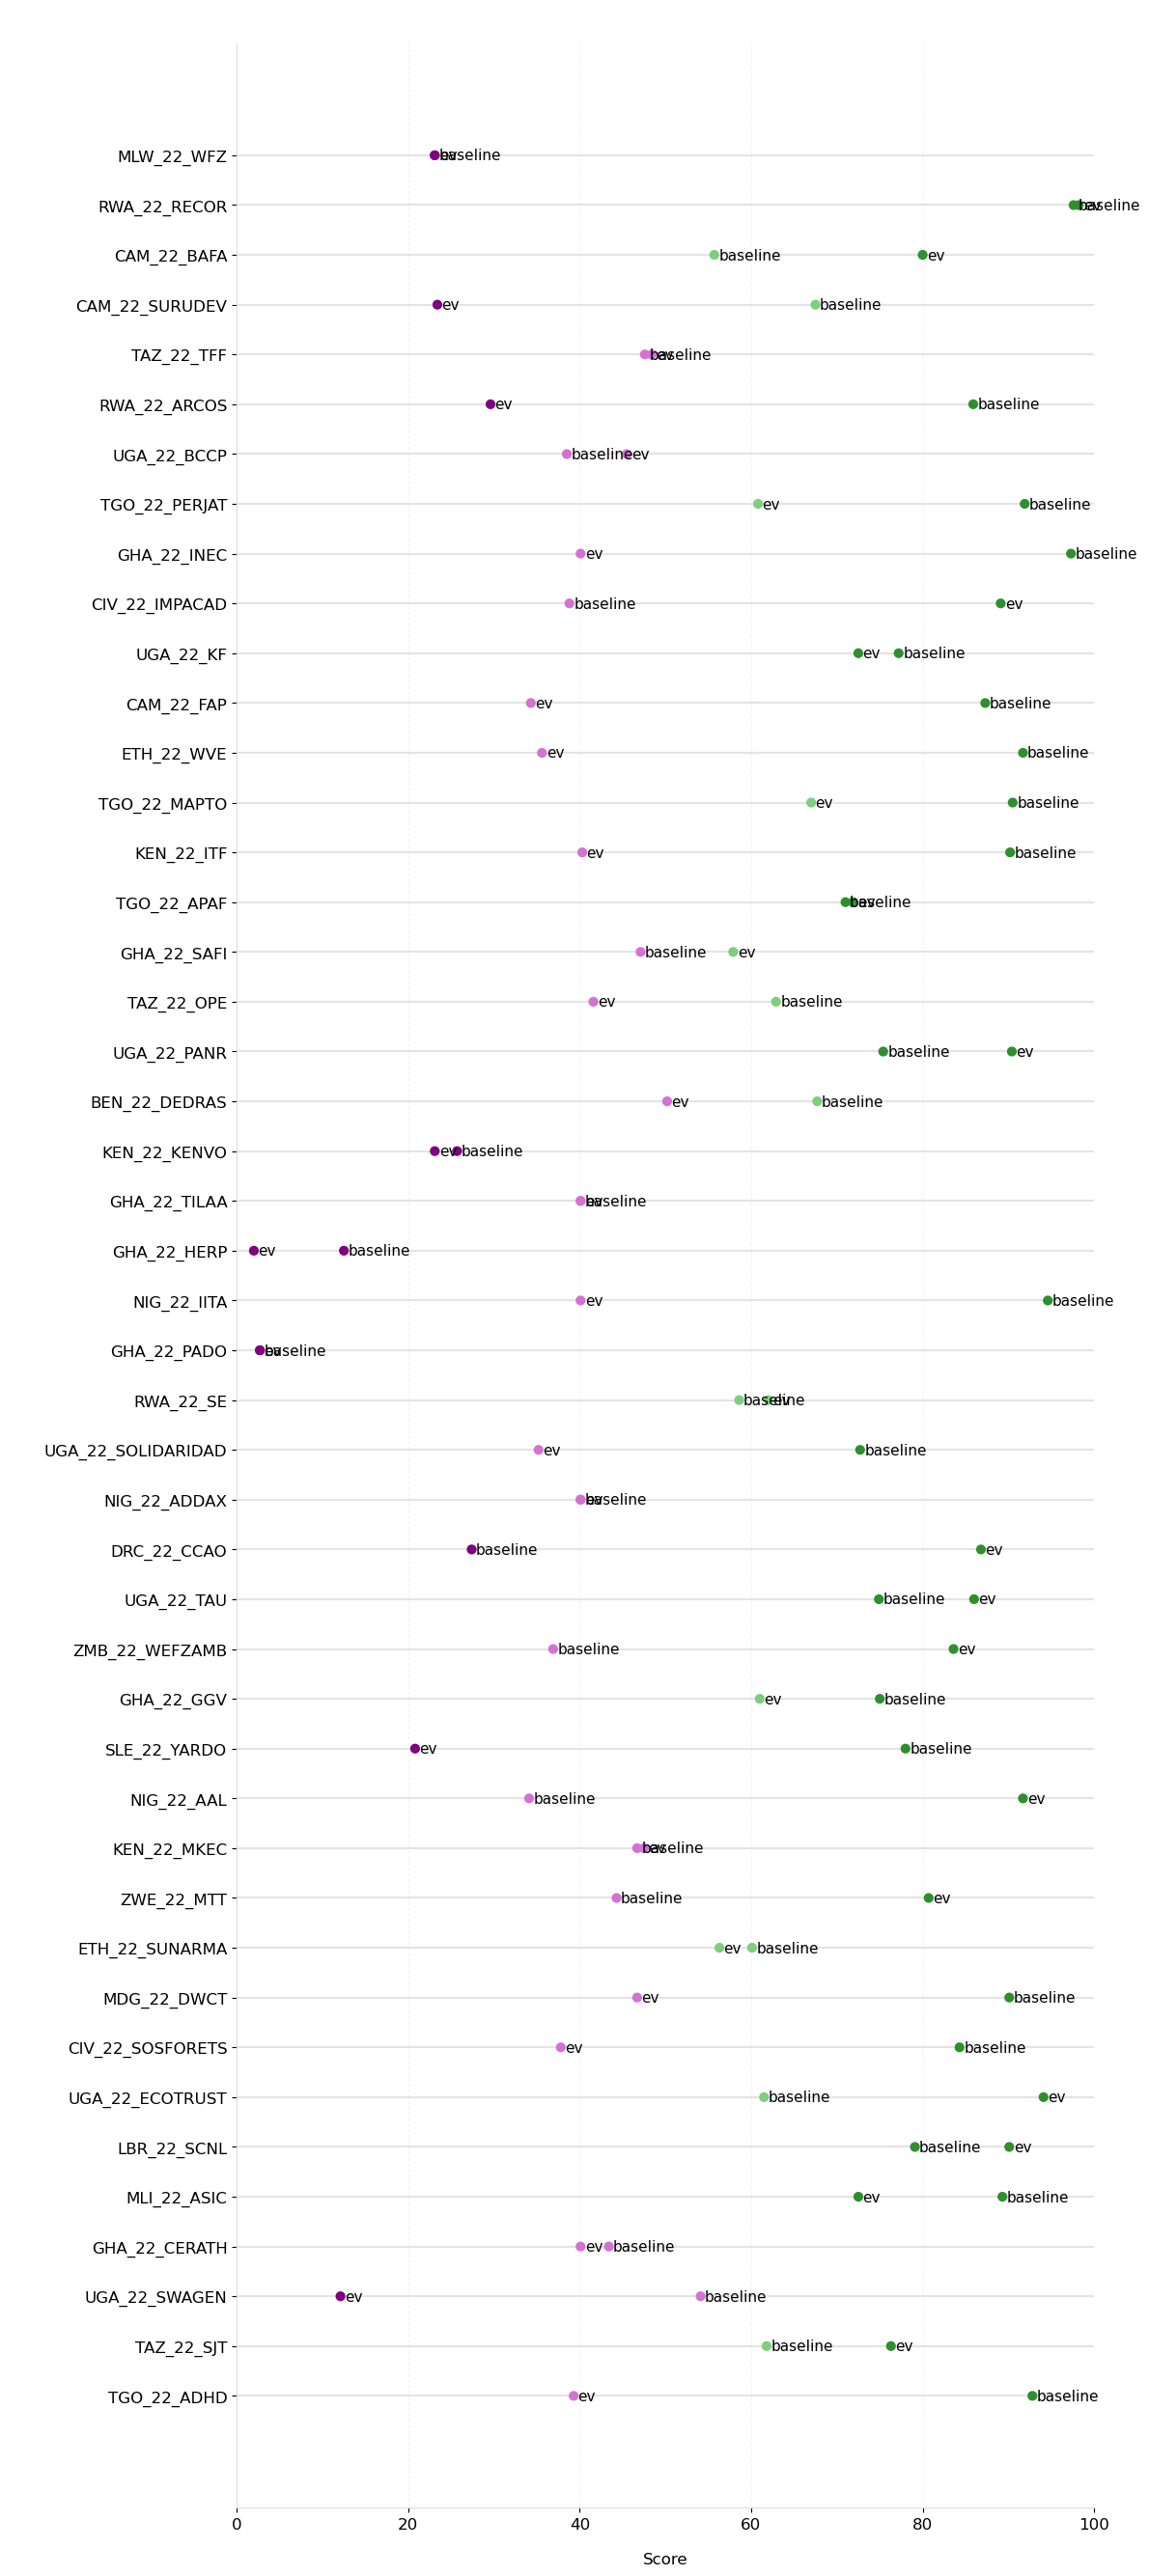

In [8]:
vis.plot_project_scores_dumbbell(prj,full_list)